## CAR PRICE PREDICTION

## 1.Data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [4]:

df=pd.read_csv(r'C:\Users\Hi\Car price data.csv')

In [5]:
df.head()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,AccentEXECUTIVE,252099,2009,Hyderabad,Petrol,83525,Manual,2,â‚¹5608
1,1,Maruti,CelerioZXI,717699,2021,Hyderabad,Petrol,2072,Manual,1,â‚¹15965
2,2,Hyundai,i10SPORTZ 1.2,284199,2009,Hyderabad,Petrol,82752,Manual,1,â‚¹6322
3,3,Hyundai,Creta1.6 SX CRDI,1099699,2016,Hyderabad,Diesel,44442,Manual,1,â‚¹24462
4,4,Maruti,SwiftVXI,433499,2013,Hyderabad,Petrol,61650,Manual,1,â‚¹9643


In [6]:
df.shape

(5521, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5521 non-null   int64 
 1   Car Brand      5521 non-null   object
 2   Model          5446 non-null   object
 3   Price          5521 non-null   int64 
 4   Model Year     5521 non-null   int64 
 5   Location       5521 non-null   object
 6   Fuel           5521 non-null   object
 7   Driven (Kms)   5521 non-null   int64 
 8   Gear           5446 non-null   object
 9   Ownership      5521 non-null   int64 
 10  EMI (monthly)  5521 non-null   object
dtypes: int64(5), object(6)
memory usage: 474.6+ KB


In [8]:
df.describe(include='all')

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,5521.000000,5521,5446,5.521000e+03,5521.000000,5521,5521,5521.000000,5446,5521.000000,5521
unique,NaN,19,704,NaN,NaN,11,4,NaN,2,NaN,2875
top,NaN,Maruti,BalenoDELTA 1.2 K12,NaN,NaN,Ahmedabad,Petrol,NaN,Manual,NaN,â‚¹7490
freq,NaN,2644,194,NaN,NaN,794,3846,NaN,4598,NaN,30
mean,2760.000000,NaN,NaN,6.596345e+05,2017.139286,NaN,NaN,44522.301757,NaN,1.220793,NaN
std,1593.919749,NaN,NaN,3.475315e+05,2.361370,NaN,NaN,30248.395428,NaN,0.460752,NaN
min,0.000000,NaN,NaN,1.923990e+05,2008.000000,NaN,NaN,71.000000,NaN,1.000000,NaN
25%,1380.000000,NaN,NaN,4.219990e+05,2016.000000,NaN,NaN,22149.000000,NaN,1.000000,NaN
50%,2760.000000,NaN,NaN,5.594990e+05,2017.000000,NaN,NaN,39323.000000,NaN,1.000000,NaN
75%,4140.000000,NaN,NaN,7.784990e+05,2019.000000,NaN,NaN,61566.000000,NaN,1.000000,NaN


### 2. Data Cleaning

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Model            75
Gear             75
Car Brand         0
Price             0
Model Year        0
Location          0
Fuel              0
Driven (Kms)      0
Ownership         0
EMI (monthly)     0
dtype: int64

<AxesSubplot:>

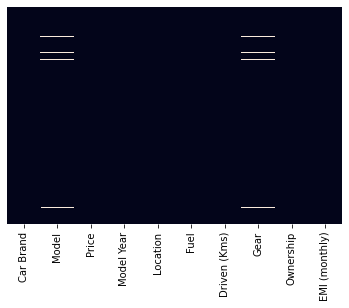

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
# fill missing values using mode of the categorical column

df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Gear'] = df['Gear'].fillna(df['Gear'].mode()[0])

In [13]:
df.isnull().sum()

Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

### 3.Exploratory Data Analysis

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('------------------------------')


Maruti        2644
Hyundai       1124
Honda          387
Ford           310
Renault        199
Toyota         170
Mahindra       140
Tata           127
Volkswagen      94
MG              73
KIA             57
Jeep            52
Audi            33
Datsun          25
Skoda           25
Nissan          25
Mercedes        19
BMW             13
Jaguar           4
Name: Car Brand, dtype: int64
------------------------------
BalenoDELTA 1.2 K12        269
Alto 800LXI                169
Wagon R 1.0VXI             143
Alto K10VXI                136
SwiftVDI                   132
                          ... 
S PRESSOLXI                  1
New Figo1.2 TITANIUM         1
CompassLIMITED (O) 2.0       1
BalenoDELTA 1.2 K12 AMT      1
Brio1.2 E MT I VTEC          1
Name: Model, Length: 704, dtype: int64
------------------------------
336699     30
344999     14
475999     11
548699     11
352899     10
           ..
1737899     1
914899      1
595399      1
693699      1
460799      1
Name: Price, 

In [15]:
df.columns

Index(['Car Brand', 'Model', 'Price', 'Model Year', 'Location', 'Fuel',
       'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

In [16]:
details=['Car Brand','Model Year', 'Location', 'Fuel','Gear', 'Ownership']

Maruti        2644
Hyundai       1124
Honda          387
Ford           310
Renault        199
Toyota         170
Mahindra       140
Tata           127
Volkswagen      94
MG              73
KIA             57
Jeep            52
Audi            33
Datsun          25
Skoda           25
Nissan          25
Mercedes        19
BMW             13
Jaguar           4
Name: Car Brand, dtype: int64


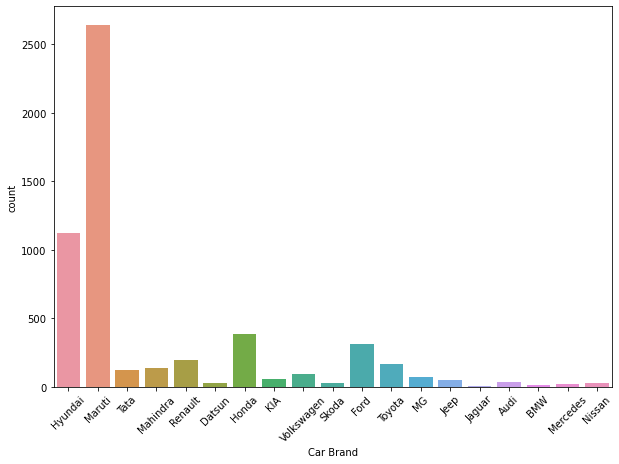

_________________________________________________________--
2018    927
2017    926
2019    823
2016    636
2020    538
2015    508
2014    392
2021    342
2013    268
2012     72
2011     34
2010     29
2009     17
2022      7
2008      2
Name: Model Year, dtype: int64


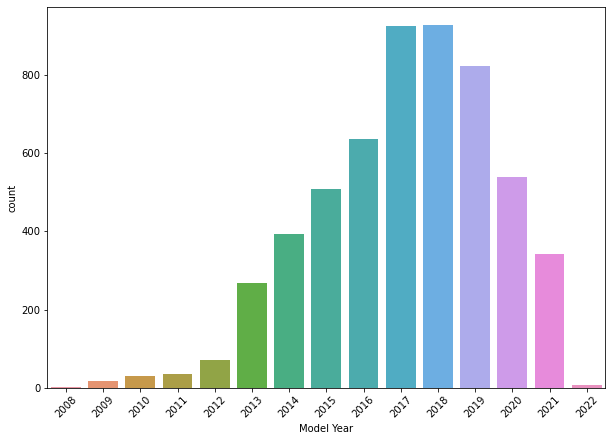

_________________________________________________________--
Ahmedabad     794
Noida         716
Delhi         716
Gurgaon       716
Mumbai        603
Chennai       559
Pune          450
Bangalore     401
Hyderabad     251
Kolkata       170
Chandigarh    145
Name: Location, dtype: int64


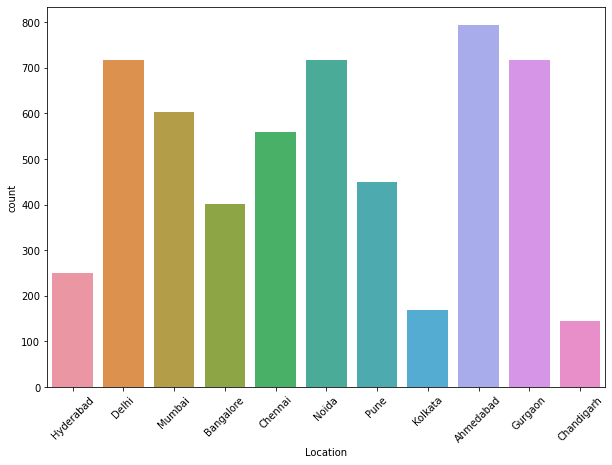

_________________________________________________________--
Petrol          3846
Diesel          1617
Petrol + CNG      57
Petrol + LPG       1
Name: Fuel, dtype: int64


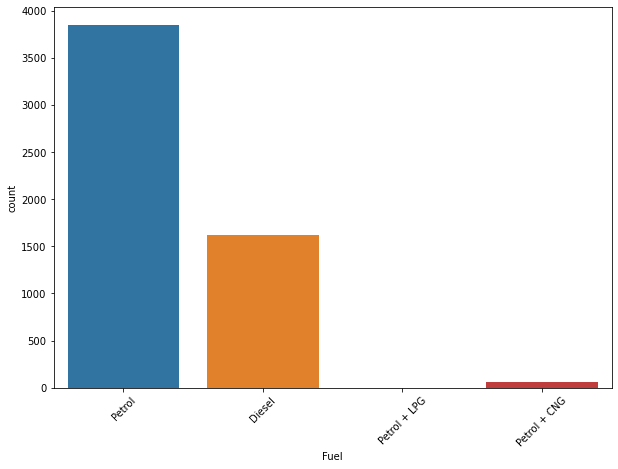

_________________________________________________________--
Manual       4673
Automatic     848
Name: Gear, dtype: int64


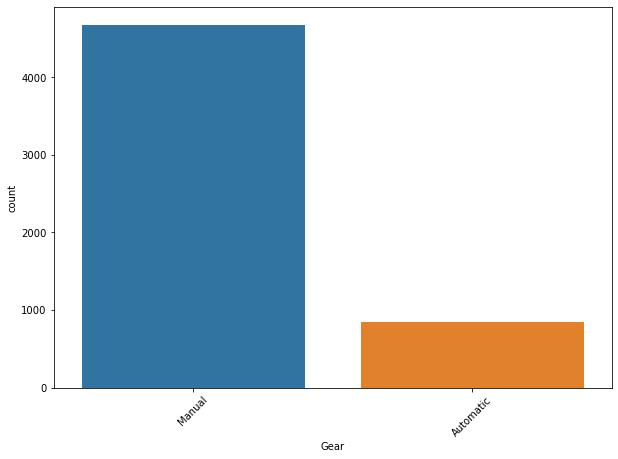

_________________________________________________________--
1    4409
2    1009
3      99
4       4
Name: Ownership, dtype: int64


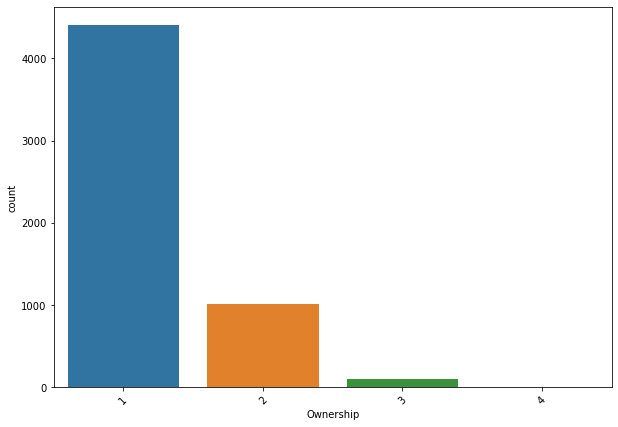

_________________________________________________________--


In [17]:
for column in details:
    print(df[column].value_counts())
    plt.figure(figsize=(10,7))
    sns.countplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()
    print("_________________________________________________________--")

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Model Year'}>,
        <AxesSubplot:title={'center':'Driven (Kms)'}>,
        <AxesSubplot:title={'center':'Ownership'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

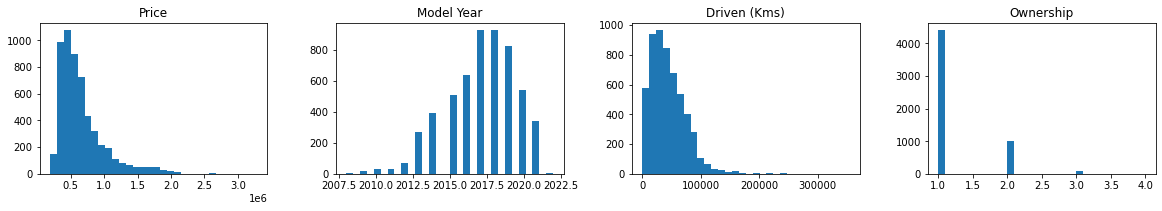

In [18]:
df.hist(figsize=(20,10), grid=False, layout=(3, 4), bins = 30)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


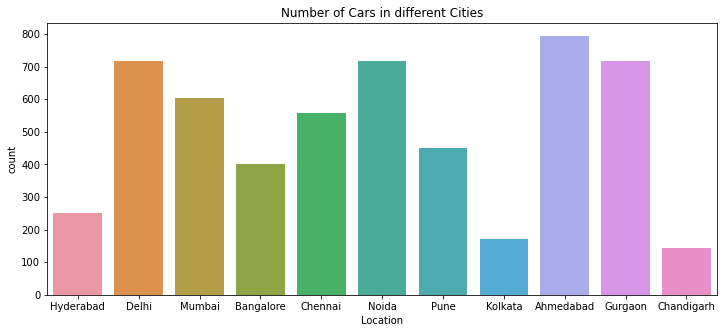

In [19]:
plt.figure(figsize=[12,5])
sns.countplot(df.Location)
plt.title('Number of Cars in different Cities')
plt.show()

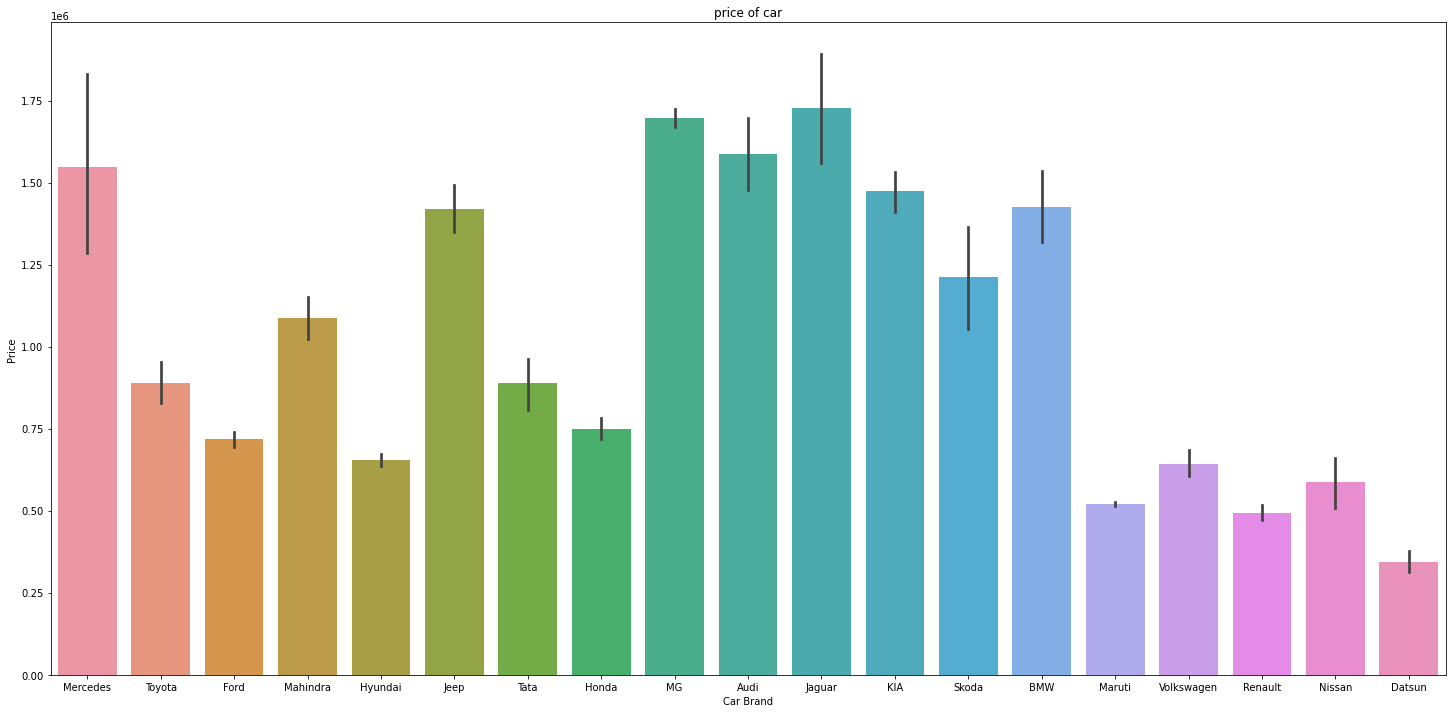

In [20]:
plt.figure(figsize=[25,12])
sns.barplot(x='Car Brand', y='Price', data = df.sort_values('Price', ascending=False))
plt.title('price of car')
plt.show()

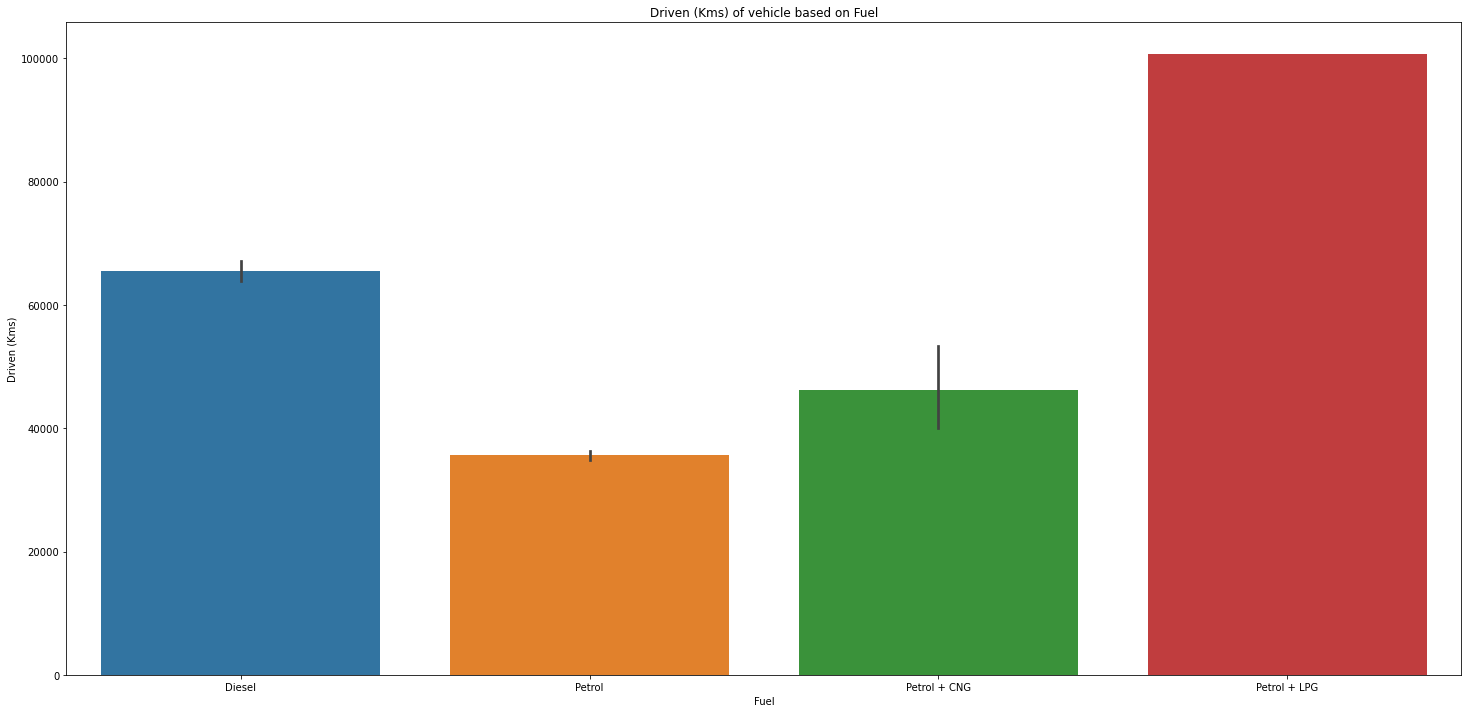

In [21]:
plt.figure(figsize=[25,12])
sns.barplot(x='Fuel', y='Driven (Kms)', data = df.sort_values('Price', ascending=False))
plt.title('Driven (Kms) of vehicle based on Fuel')
plt.show()

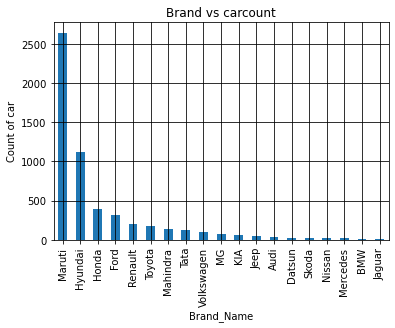

In [22]:
plt.xlabel("Brand_Name")
plt.ylabel("Count of car")
df['Car Brand'].value_counts().plot(kind='bar',title='Brand vs carcount')
plt.grid(color='black')

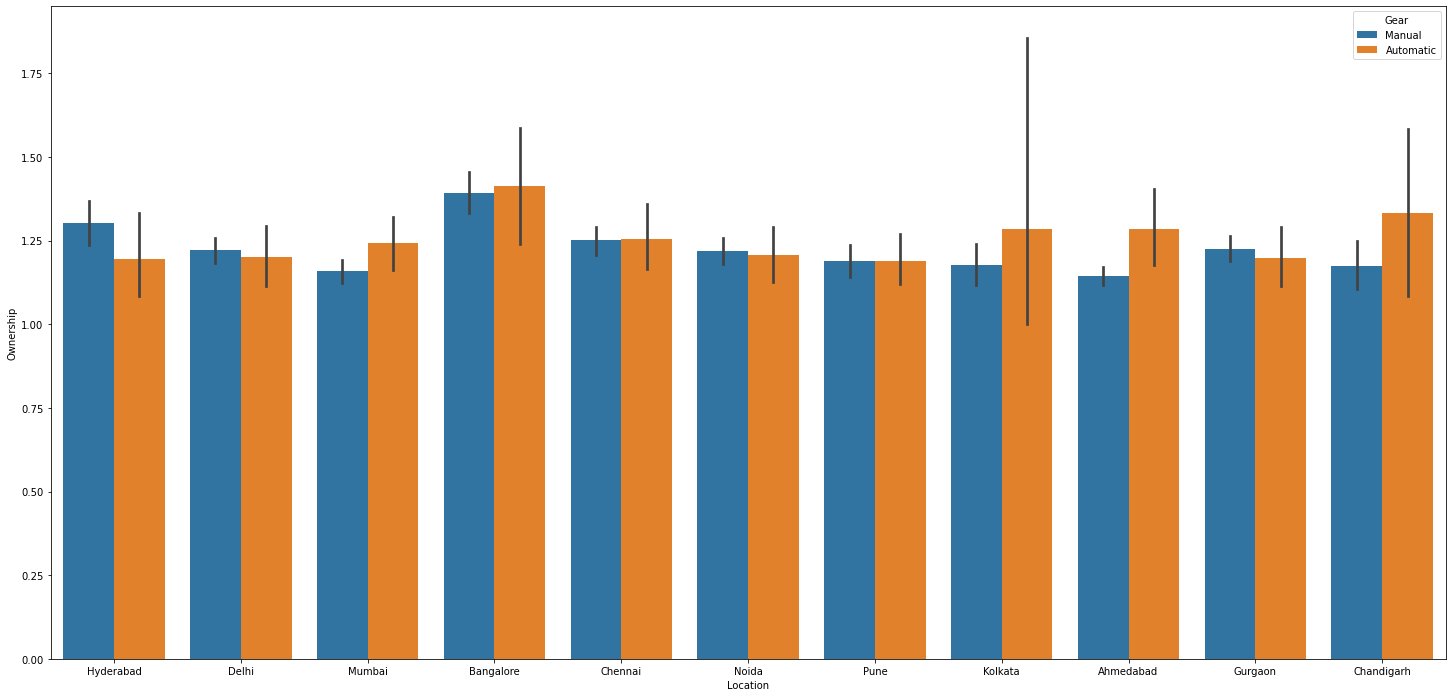

In [23]:
plt.figure(figsize=[25,12])
ax = sns.barplot(x="Location", y="Ownership", hue='Gear', data=df)

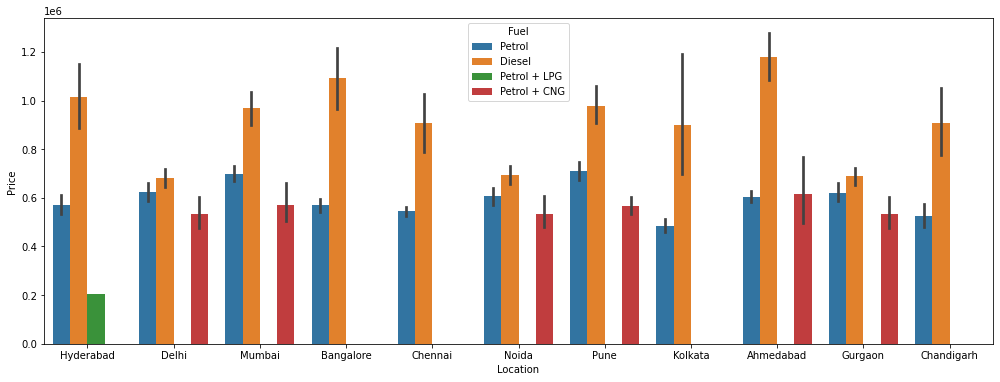

In [24]:
plt.figure(figsize=[17,6])
ax = sns.barplot(x="Location", y='Price', hue='Fuel', data=df)

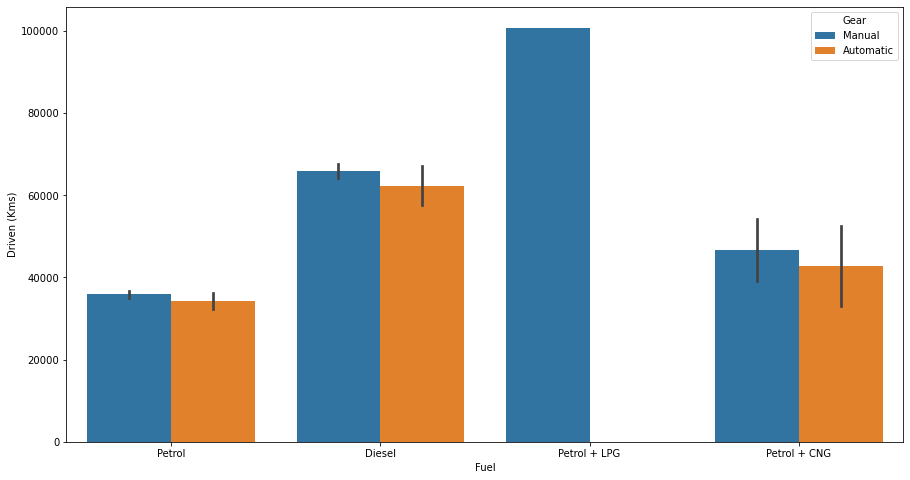

In [25]:
plt.figure(figsize=[15,8])
ax = sns.barplot(x='Fuel', y='Driven (Kms)',hue='Gear', data=df)

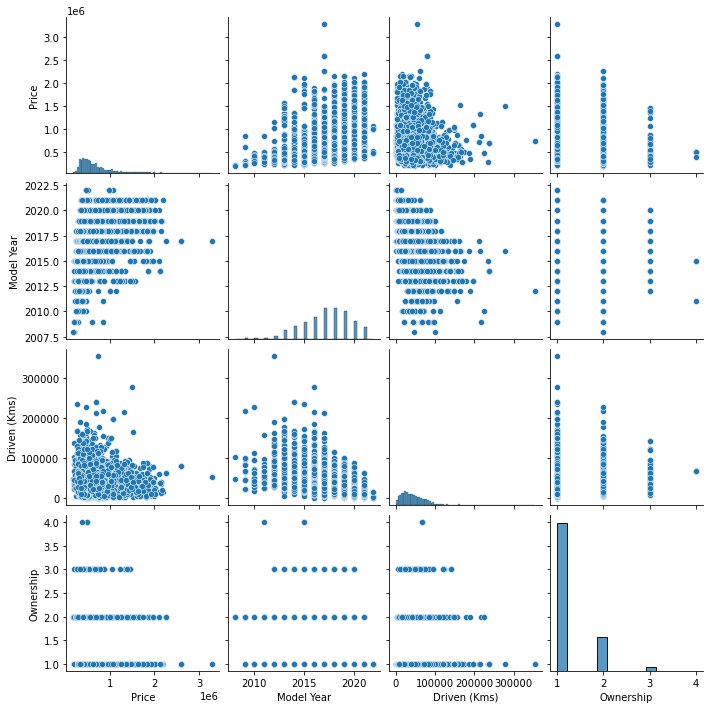

In [26]:
sns.pairplot(df)

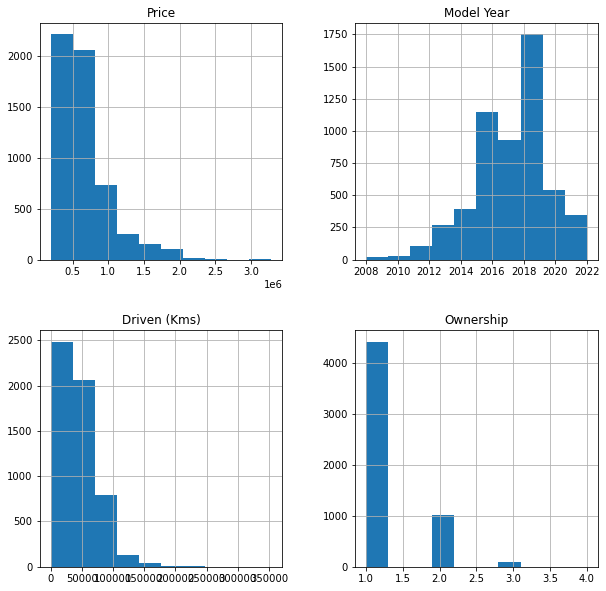

In [27]:
df.hist(figsize=(10, 10));

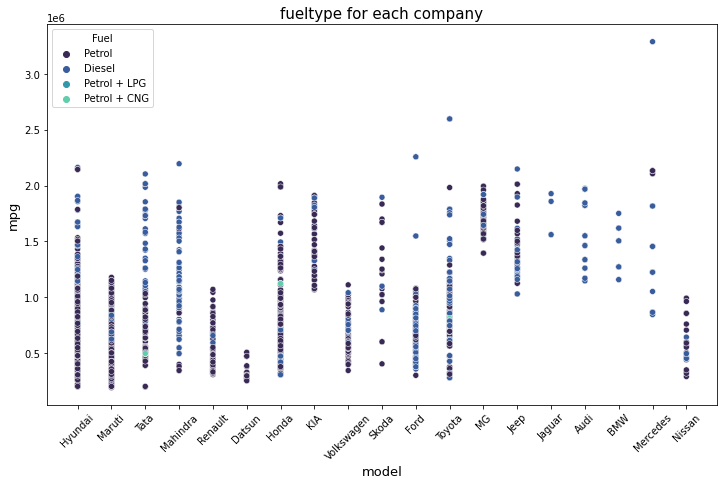

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Car Brand",y="Price",data=df[0:10000],hue="Fuel",palette="mako")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("mpg" , size=13)
plt.xticks(rotation=45)
plt.show()

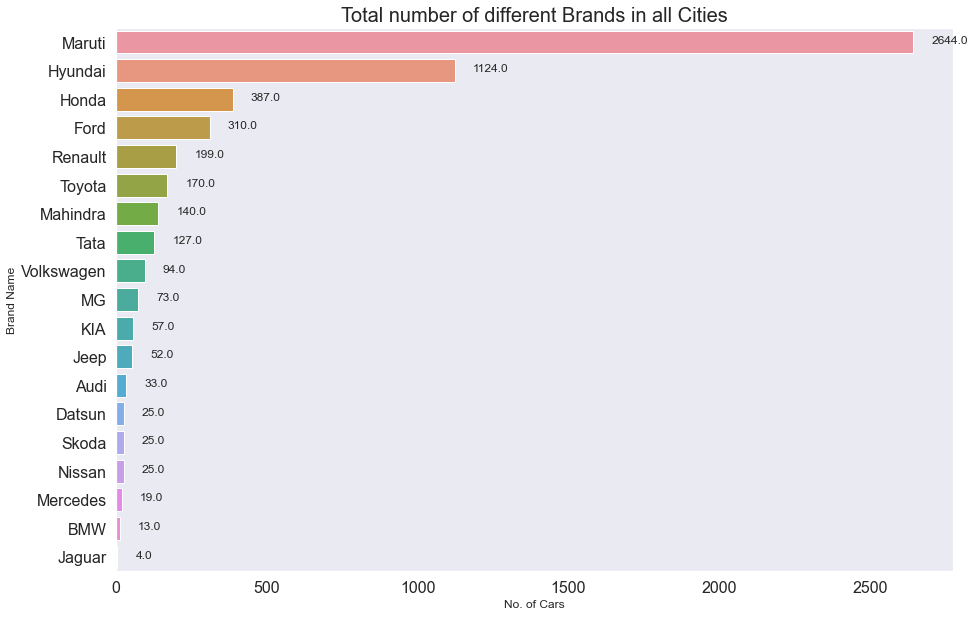

In [29]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(y ='Brand',x='Count',data=brand_count)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for p in a.patches:
    width = p.get_width()
    plt.text(60+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width))
a.set_xlabel("No. of Cars")
a.set_ylabel("Brand Name")
plt.title("Total number of different Brands in all Cities",fontsize=20)
plt.grid(False)

### Correlation

In [30]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

<AxesSubplot:>

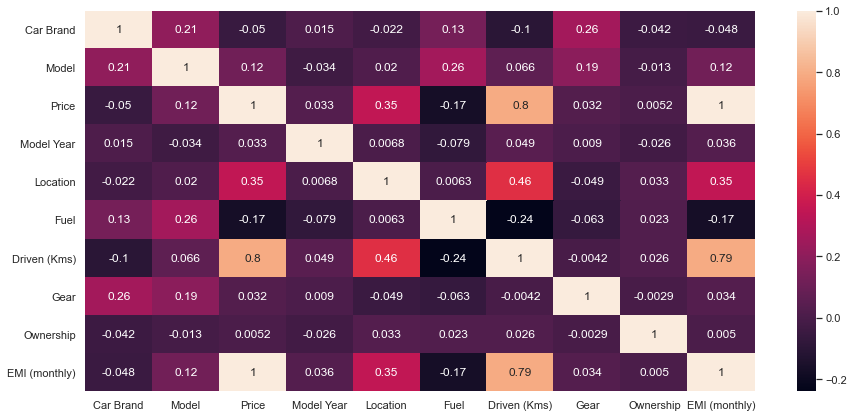

In [31]:
plt.figure(figsize=[15,7])
sns.heatmap(df_corr,annot=True)

Outcome of correlation From heatmap partner dataset has positive correlation .

1.Driven(kms) has 80 percent correlation with target column which can be considered as a good bond.

2.Location has 35 percent correlation with target column which can be considered as a good bond.

3.Model since the has 12 percent correlation with target column which can be considered as a good bond.

4.Model year has 3.3  percent correlation with target column which can be considered as a bad bond

5.Gear has 3.2 percent correlation with target column which can be considered as a  bad bond.

max correlation :Driven(kms

min correlation: Car brand and fuel

In [32]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})


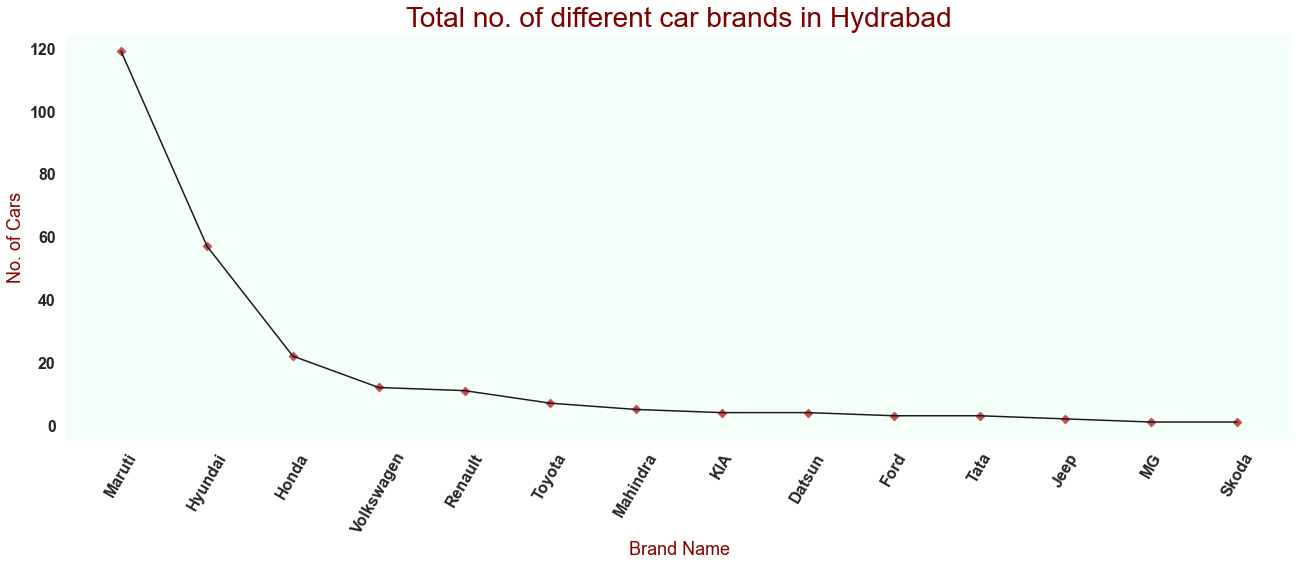

In [33]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=hyd_brands,color='k')
plt.scatter('Brand','Count',data=hyd_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Hydrabad",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

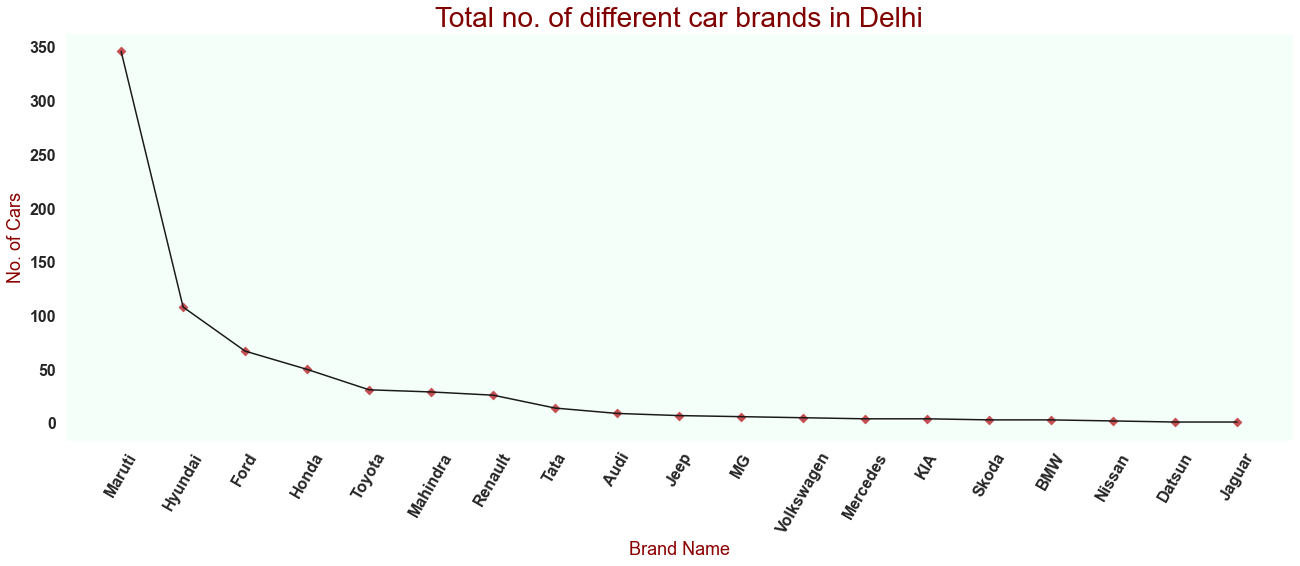

In [34]:
delhi_city = df.loc[(df['Location'] == 'Delhi')]
delhi_brands = delhi_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=delhi_brands,color='k')
plt.scatter('Brand','Count',data=delhi_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

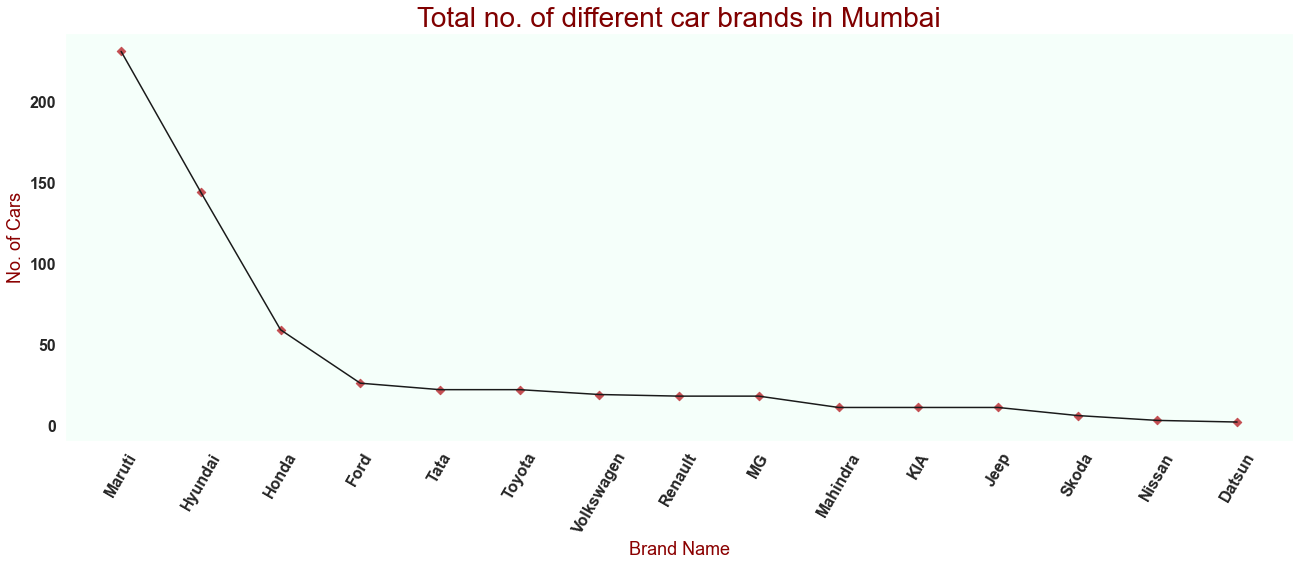

In [35]:
mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=mumbai_brands,color='k')
plt.scatter('Brand','Count',data=mumbai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Mumbai",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

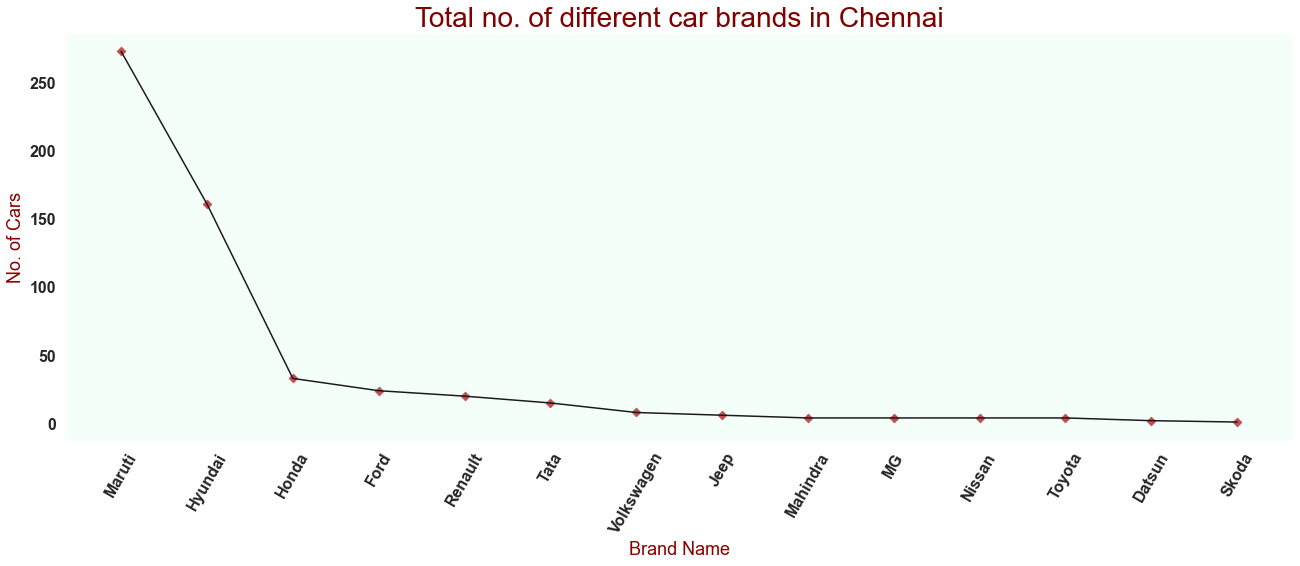

In [36]:
chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=chennai_brands,color='k')
plt.scatter('Brand','Count',data=chennai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Chennai",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

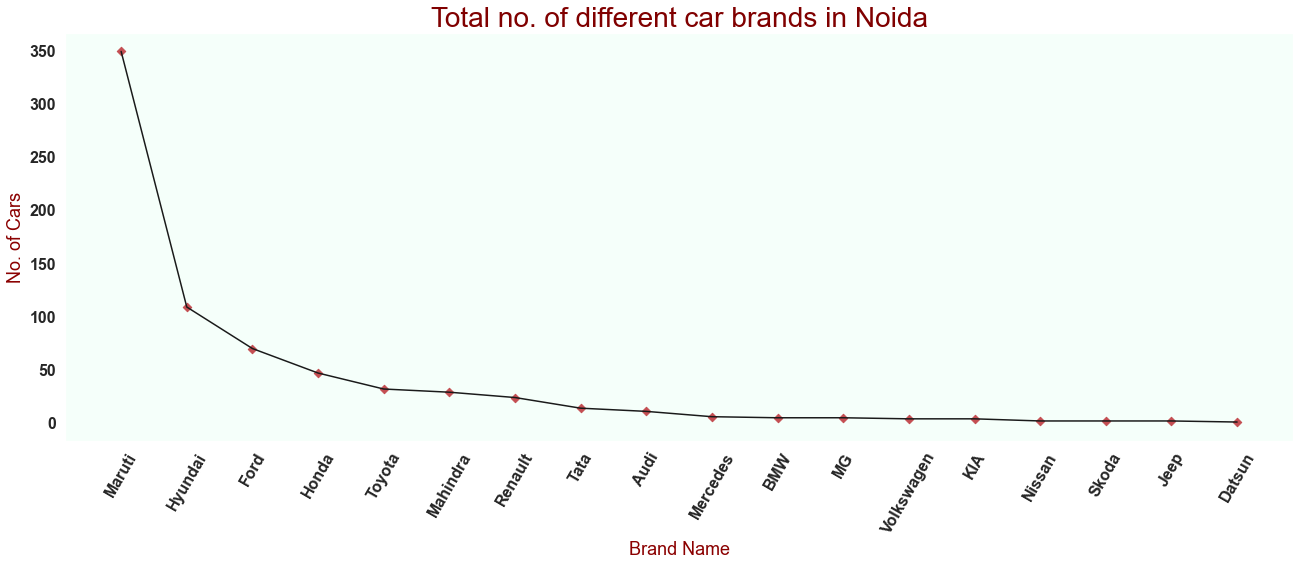

In [37]:
Noida_city = df.loc[(df['Location'] == 'Noida')]
Noida_brands = Noida_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Noida_brands,color='k')
plt.scatter('Brand','Count',data=Noida_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Noida",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

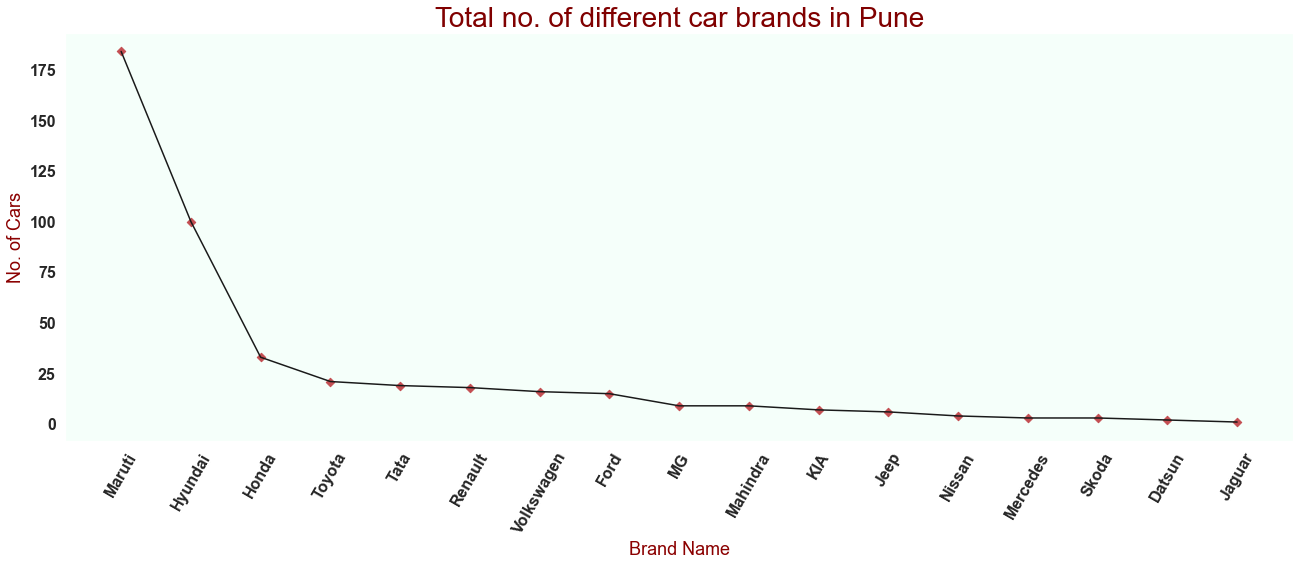

In [38]:
Pune_city = df.loc[(df['Location'] == 'Pune')]
Pune_brands = Pune_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Pune_brands,color='k')
plt.scatter('Brand','Count',data=Pune_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Pune",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

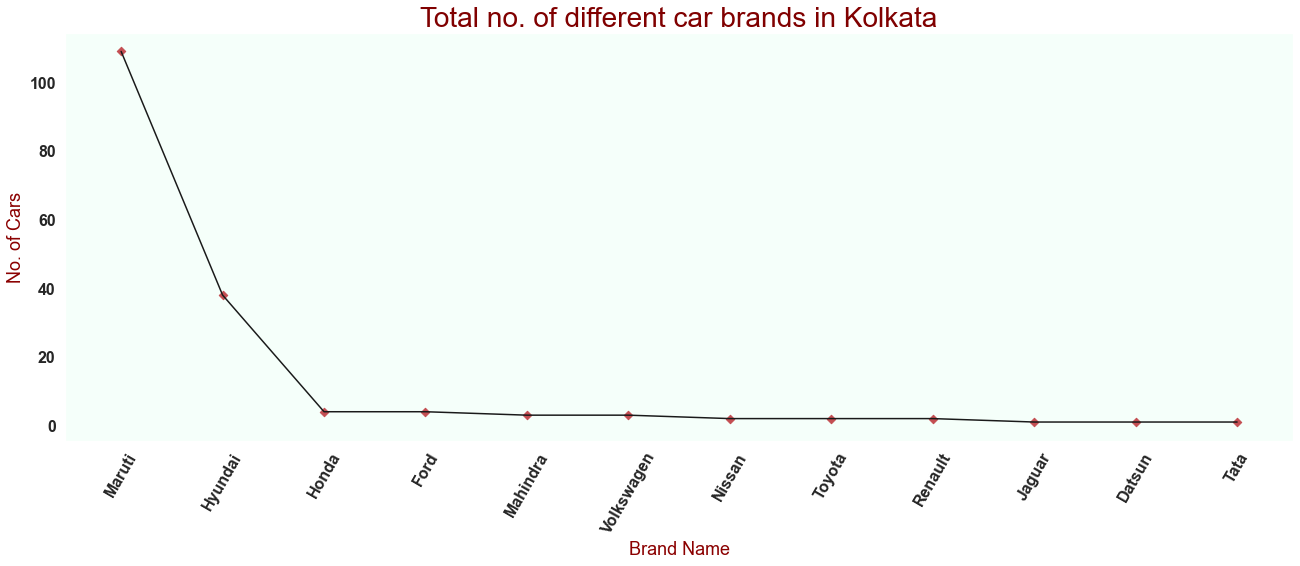

In [39]:
Kolkata_city = df.loc[(df['Location'] == 'Kolkata')]
Kolkata_brands = Kolkata_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Kolkata_brands,color='k')
plt.scatter('Brand','Count',data=Kolkata_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Kolkata",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

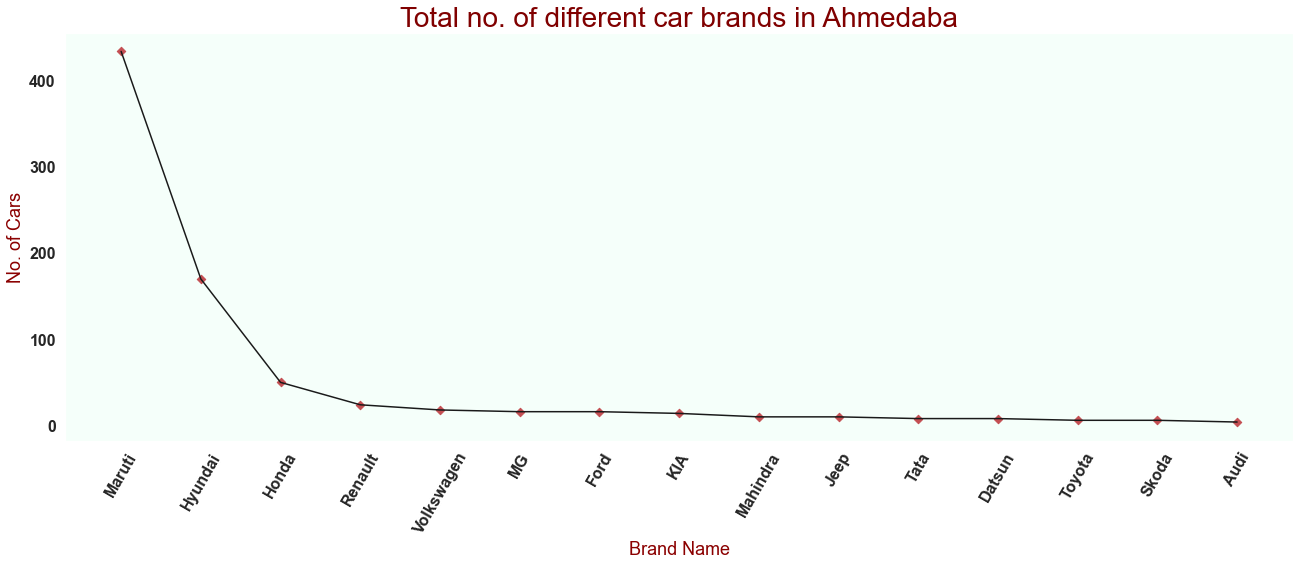

In [40]:
Ahmedabad_city = df.loc[(df['Location'] == 'Ahmedabad')]
Ahmedabad_brands = Ahmedabad_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Ahmedabad_brands,color='k')
plt.scatter('Brand','Count',data=Ahmedabad_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Ahmedaba",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

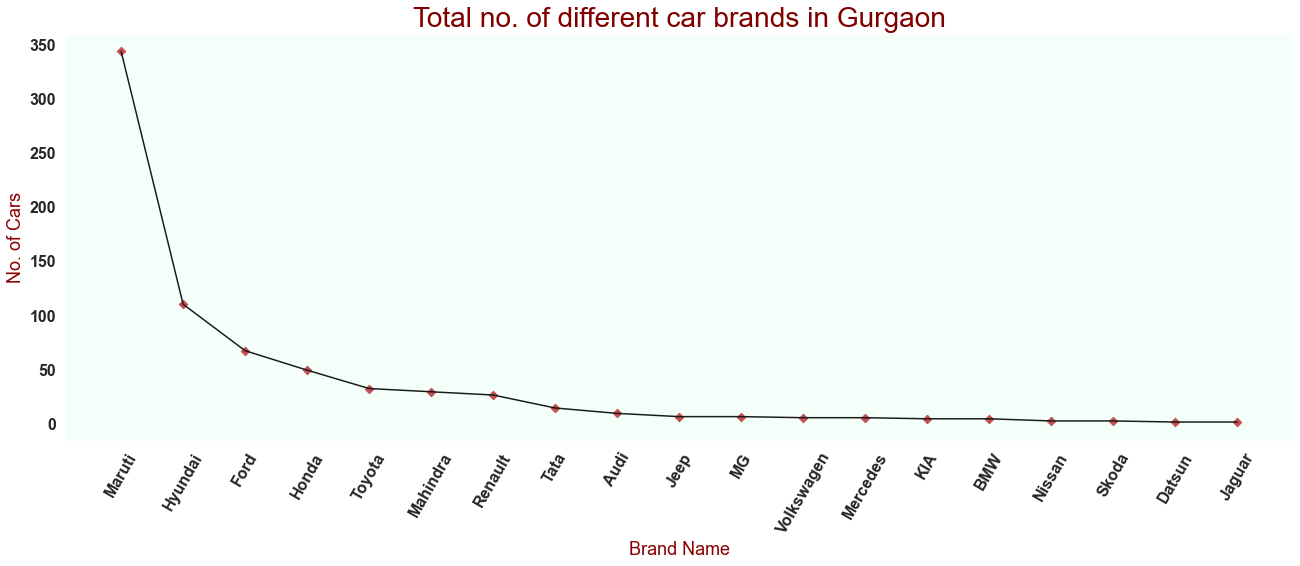

In [41]:
Gurgaon_city = df.loc[(df['Location'] == 'Gurgaon')]
Gurgaon_brands = Gurgaon_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Gurgaon_brands,color='k')
plt.scatter('Brand','Count',data=Gurgaon_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Gurgaon",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

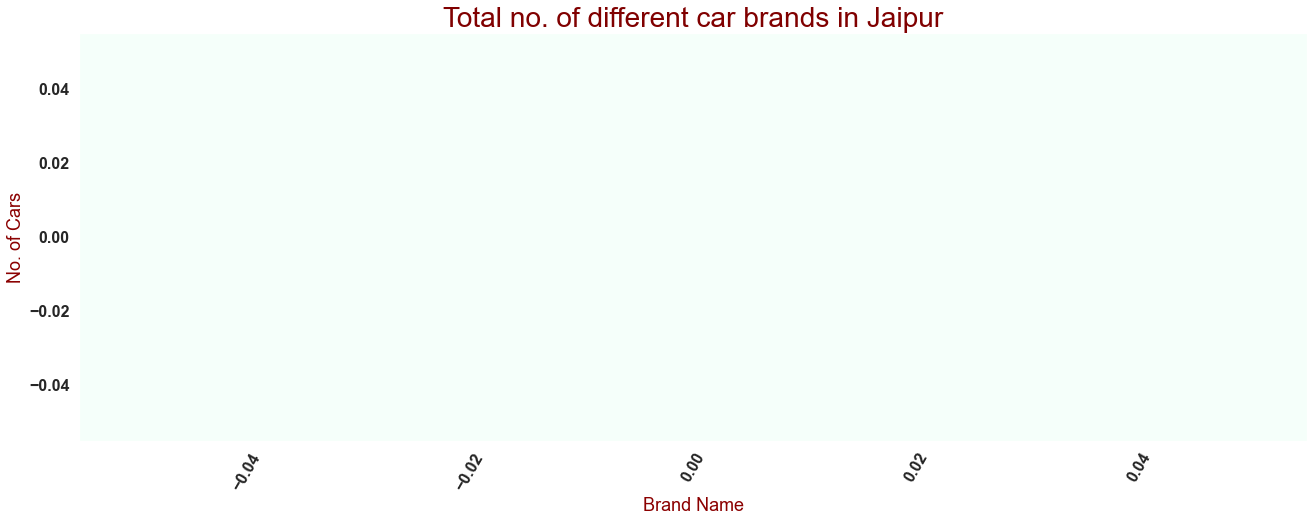

In [42]:
Jaipur_city = df.loc[(df['Location'] == 'Jaipur')]
Jaipur_brands = Jaipur_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Jaipur_brands,color='k')
plt.scatter('Brand','Count',data=Jaipur_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Jaipur",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

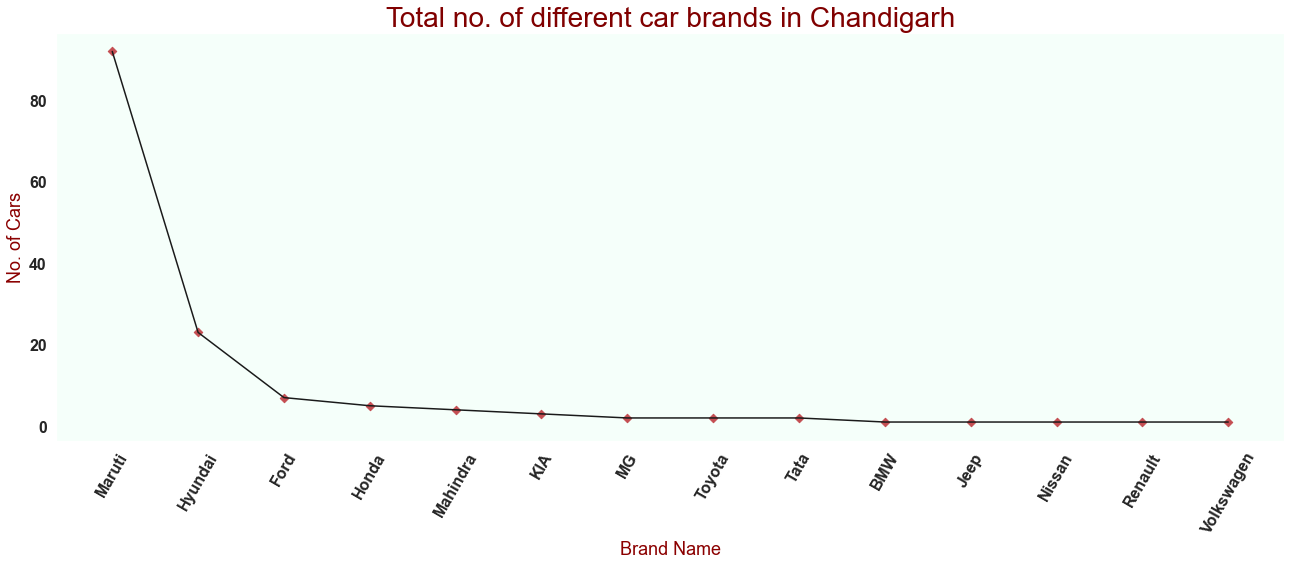

In [43]:
Chandigarh_city = df.loc[(df['Location'] == 'Chandigarh')]
Chandigarh_brands = Chandigarh_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=Chandigarh_brands,color='k')
plt.scatter('Brand','Count',data=Chandigarh_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Chandigarh",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

### 4.Data Pre processing

### Encoding

In [44]:
categ_columns=['Car Brand','Model','Gear','Fuel','Location' ]
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car Brand      5521 non-null   int32
 1   Model          5521 non-null   int32
 2   Price          5521 non-null   int64
 3   Model Year     5521 non-null   int64
 4   Location       5521 non-null   int32
 5   Fuel           5521 non-null   int32
 6   Driven (Kms)   5521 non-null   int64
 7   Gear           5521 non-null   int32
 8   Ownership      5521 non-null   int64
 9   EMI (monthly)  5521 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 302.1 KB


### Skewness removal

In [46]:
df.skew()

Car Brand       -0.032247
Model            0.094228
Price            1.793917
Model Year      -0.508773
Location        -0.017386
Fuel            -0.647378
Driven (Kms)     1.510913
Gear            -1.922001
Ownership        1.988674
EMI (monthly)    0.016610
dtype: float64

There is not much skewness present in the data.

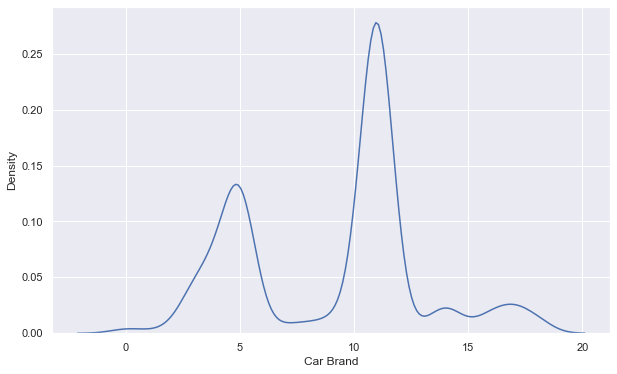

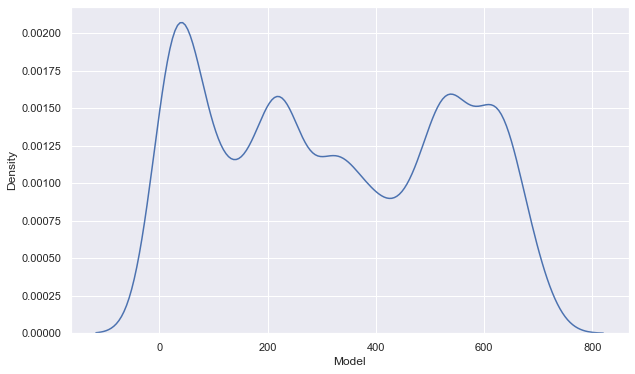

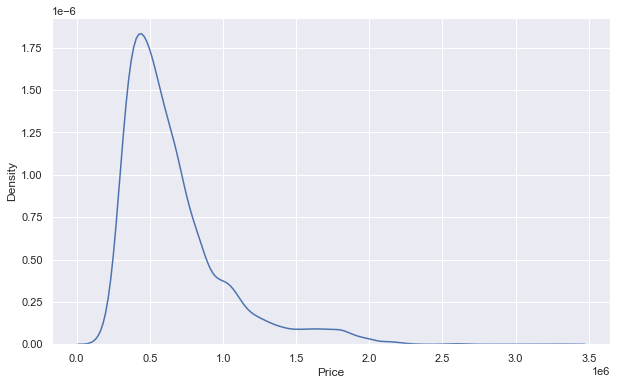

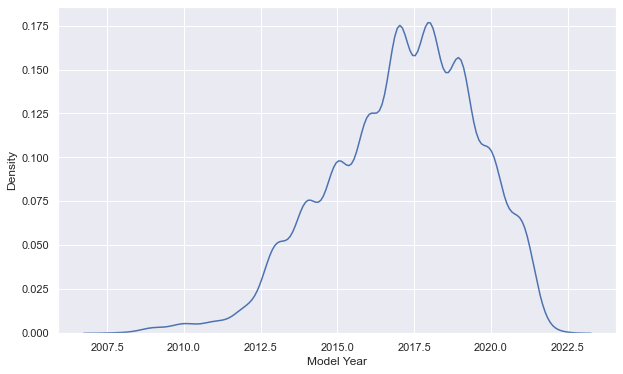

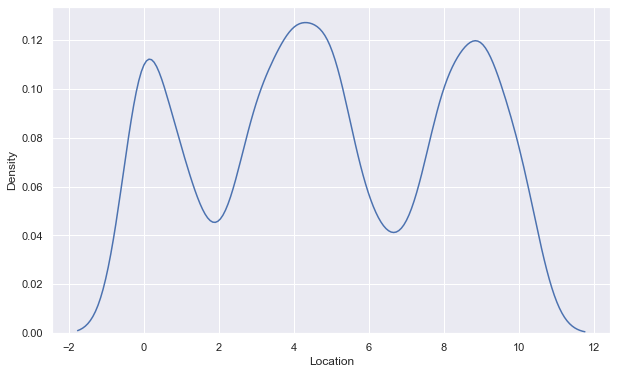

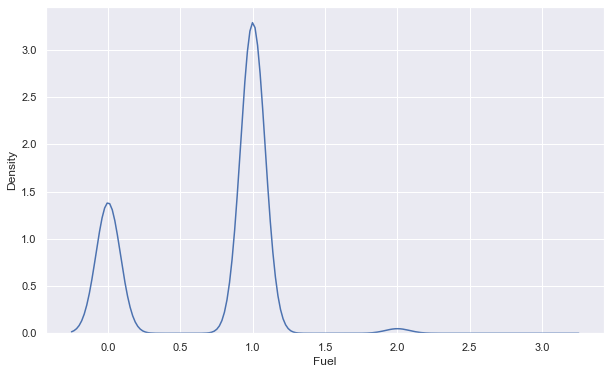

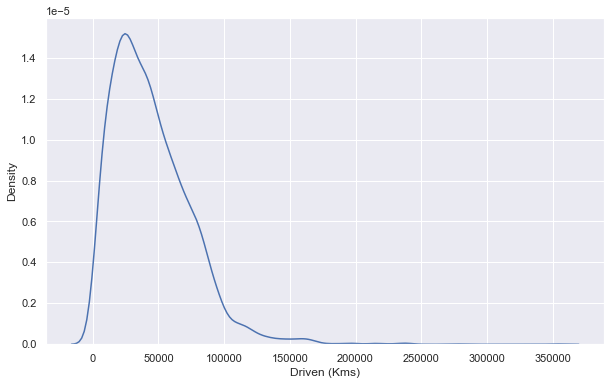

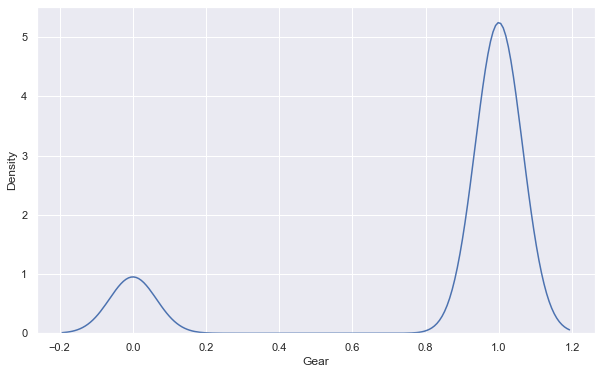

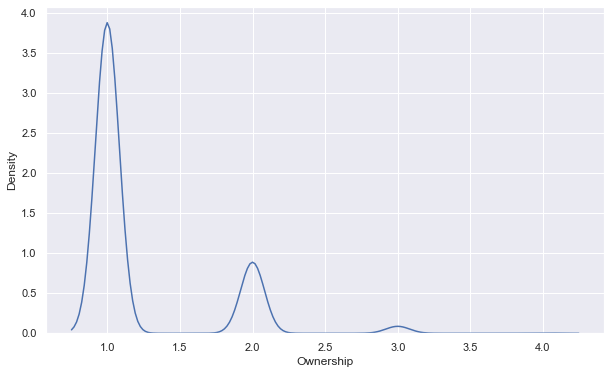

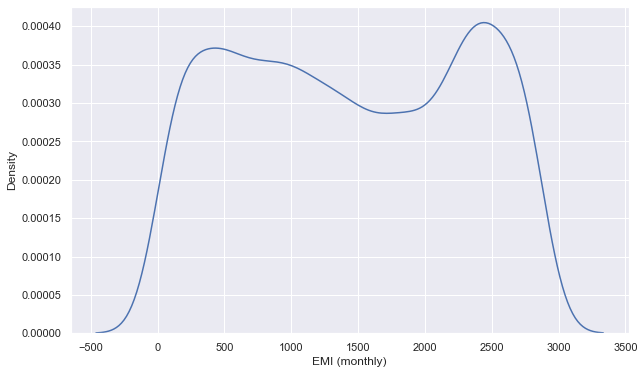

In [47]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(x=i,data=df)

### Outliers checking

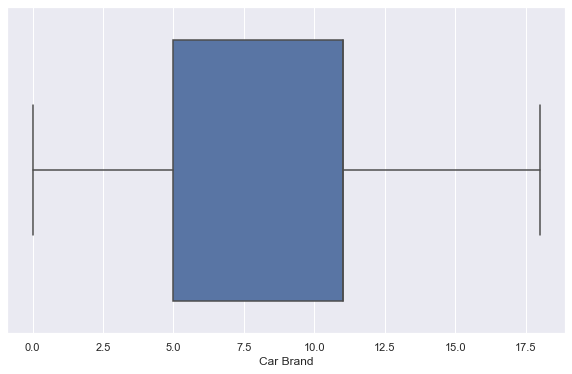

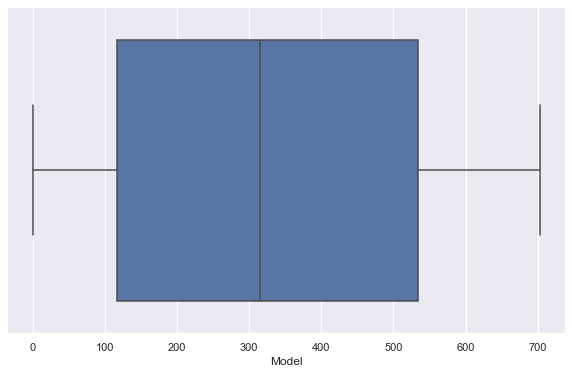

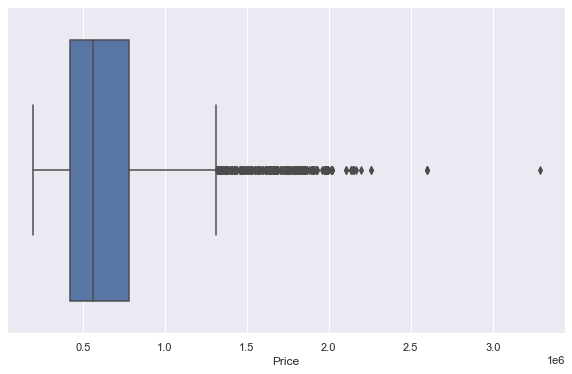

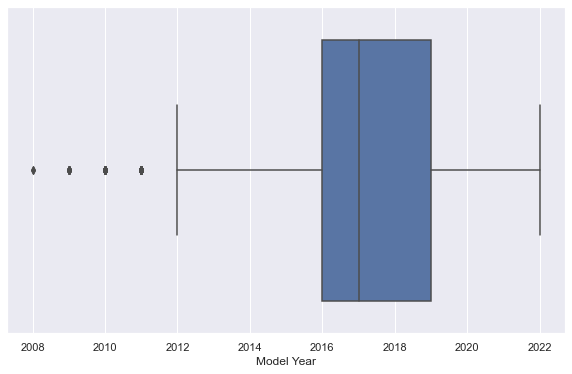

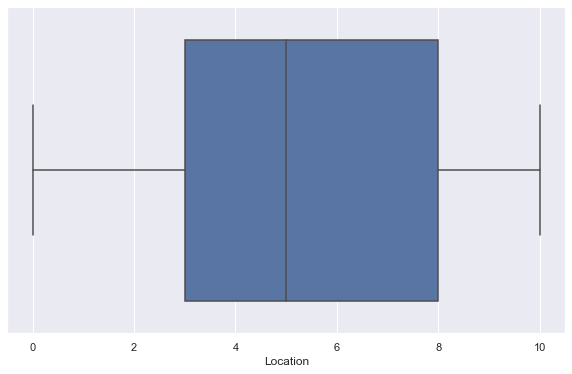

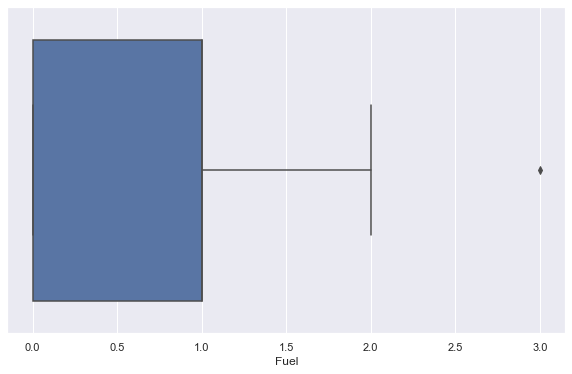

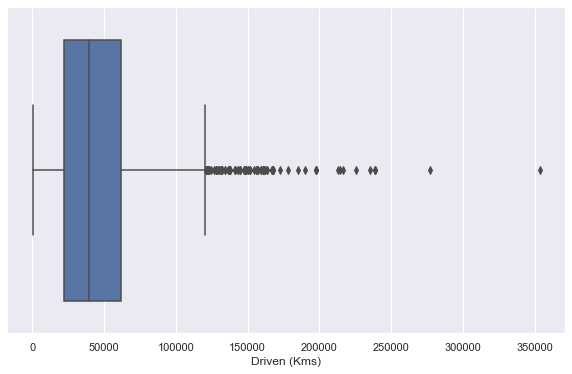

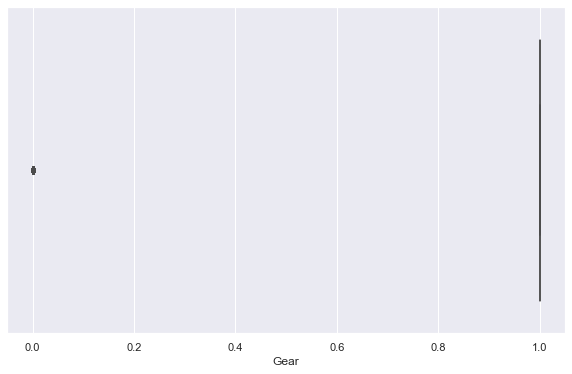

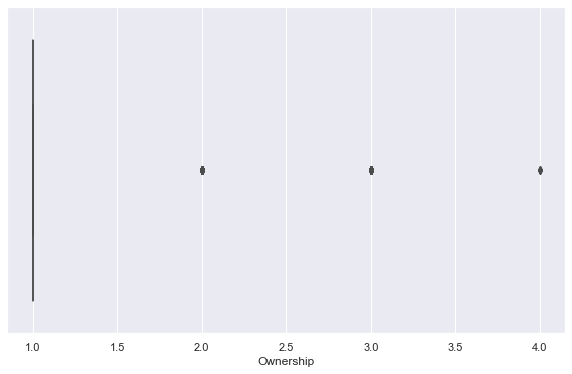

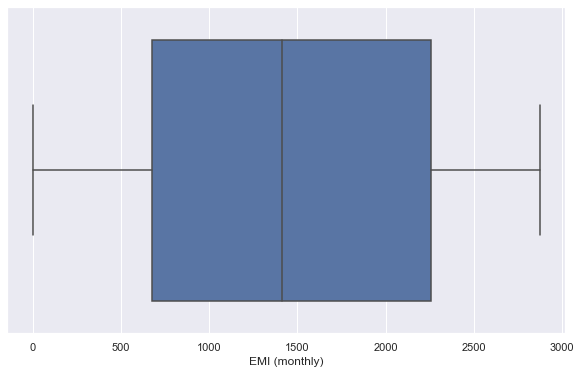

In [48]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.boxplot(x=i,data=df)

### Removing outliers

Z Score_Technique

In [49]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (5521, 10)
[[1.0518585  1.42239029 1.17276397 ... 0.42599062 1.69131686 0.76237252]
 [0.4717702  1.04322825 0.16709201 ... 0.42599062 0.47924576 0.41468883]
 [1.0518585  1.67486104 1.08038988 ... 0.42599062 0.47924576 0.80768881]
 ...
 [0.4717702  1.39498098 1.0021165  ... 0.42599062 0.47924576 0.90645506]
 [0.4717702  1.3721399  0.86283594 ... 0.42599062 0.47924576 1.15511363]
 [0.4717702  1.41325385 0.92931076 ... 0.42599062 0.47924576 1.02846043]]


In [50]:
threshold = 3
print(np.where(z > 3))

(array([   0,    2,    7,    7,    8,    9,   17,   19,   43,   50,  105,
        114,  170,  172,  175,  192,  198,  208,  208,  251,  253,  254,
        255,  257,  260,  262,  265,  266,  273,  282,  283,  303,  332,
        347,  370,  379,  401,  421,  436,  491,  520,  520,  544,  559,
        573,  581,  605,  614,  633,  638,  651,  750,  753,  759,  761,
        779,  781,  783,  791,  796,  865,  867,  878,  879,  889,  895,
        897,  902,  907,  931,  951,  971,  986,  989, 1032, 1043, 1052,
       1074, 1140, 1164, 1179, 1204, 1224, 1231, 1267, 1270, 1275, 1332,
       1353, 1372, 1405, 1408, 1431, 1461, 1465, 1467, 1483, 1485, 1497,
       1509, 1514, 1516, 1517, 1518, 1522, 1523, 1524, 1531, 1542, 1548,
       1555, 1560, 1561, 1570, 1571, 1574, 1578, 1587, 1589, 1590, 1591,
       1595, 1599, 1611, 1635, 1637, 1647, 1658, 1661, 1665, 1678, 1690,
       1694, 1707, 1708, 1719, 1723, 1731, 1732, 1811, 1847, 1868, 1878,
       1890, 1899, 1918, 1923, 1928, 1935, 1948, 1

Due to heavy loss of data we don't remove outliers

### 5. Feature Engineering

In [51]:
x= df.drop(columns='Price')
y= df['Price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,Car Brand,Model,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,5,9,2009,6,1,83525,1,2,2100
1,11,92,2021,6,1,2072,1,1,1087
2,5,687,2009,6,1,82752,1,1,2139
3,5,169,2016,6,0,44442,1,1,1733
4,11,538,2013,6,1,61650,1,1,2782


In [52]:
x.shape

(5521, 9)

In [53]:
y.shape

(5521,)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### Scaling

In [55]:
#data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#fit scaler on training data
norm = MinMaxScaler().fit(x_train)

#transform training data
x_train_norm = norm.transform(x_train)

#transform testing dataabs
x_test_norm = norm.transform(x_test)

In [56]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

### 5. Model Building and evaluation

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##### Finding best random state

In [58]:
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lm=LinearRegression(fit_intercept=True, normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)   

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


accurancy 0.43474275116656436 random_state 0
accurancy 0.43474275116656436 random_state 0
accurancy 0.4156660930098003 random_state 1
accurancy 0.43474275116656436 random_state 1
accurancy 0.44655300082557736 random_state 2
accurancy 0.44655300082557736 random_state 2
accurancy 0.40769229316606237 random_state 3
accurancy 0.44655300082557736 random_state 3
accurancy

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

 0.45161873060464686 random_state 4
accurancy 0.45161873060464686 random_state 4
accurancy 0.41324994799636916 random_state 5
accurancy 0.45161873060464686 random_state 5
accurancy 0.4354298425042945 random_state 6
accurancy 0.45161873060464686 random_state 6
accurancy 0.4345252685278266 random_state 7
accurancy 0.45161873060464686 random_state 7


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4134756729192919 random_state 8
accurancy 0.45161873060464686 random_state 8
accurancy 0.40195082872556065 random_state 9
accurancy 0.45161873060464686 random_state 9
accurancy 0.42901813388616883 random_state 10
accurancy 0.45161873060464686 random_state 10
accurancy 0.4272742103307099 random_state 11
accurancy 0.45161873060464686 random_state 11
accurancy 0.4251991631602582 random_state 12
accurancy 0.45161873060464686 random_state 12


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4030274141765662 random_state 13
accurancy 0.45161873060464686 random_state 13
accurancy 0.40774591818778116 random_state 14
accurancy 0.45161873060464686 random_state 14
accurancy 0.43693211945265953 random_state 15
accurancy 0.45161873060464686 random_state 15
accurancy 0.3899754411746481 random_state 16
accurancy 0.45161873060464686 random_state 16


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4077660493772354 random_state 17
accurancy 0.45161873060464686 random_state 17
accurancy 0.4311425576485197 random_state 18
accurancy 0.45161873060464686 random_state 18
accurancy 0.42461285744035515 random_state 19
accurancy 0.45161873060464686 random_state 19
accurancy 0.41761727850495933 random_state 20
accurancy 0.45161873060464686 random_state 20


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4362902504718249 random_state 21
accurancy 0.45161873060464686 random_state 21
accurancy 0.44284554086504946 random_state 22
accurancy 0.45161873060464686 random_state 22
accurancy 0.4065386279355335 random_state 23
accurancy 0.45161873060464686 random_state 23
accurancy 0.38552312812318845 random_state 24
accurancy 0.45161873060464686 random_state 24


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.42629765789200225 random_state 25
accurancy 0.45161873060464686 random_state 25
accurancy 0.4181351189573499 random_state 26
accurancy 0.45161873060464686 random_state 26
accurancy 0.42038029104809127 random_state 27
accurancy 0.45161873060464686 random_state 27
accurancy 0.441829208903465 random_state 28
accurancy 0.45161873060464686 random_state 28


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.44000788512806355 random_state 29
accurancy 0.45161873060464686 random_state 29
accurancy 0.44471396985593625 random_state 30
accurancy 0.45161873060464686 random_state 30
accurancy 0.43505029521005845 random_state 31
accurancy 0.45161873060464686 random_state 31
accurancy 0.42272085779959667 random_state 32
accurancy 0.45161873060464686 random_state 32


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.42545039345418456 random_state 33
accurancy 0.45161873060464686 random_state 33
accurancy 0.41969653056277634 random_state 34
accurancy 0.45161873060464686 random_state 34
accurancy 0.43931194455933187 random_state 35
accurancy 0.45161873060464686 random_state 35
accurancy 0.4396055036498625 random_state 36
accurancy 0.45161873060464686 random_state 36
accurancy 0.4320890161169343 random_state 37
accurancy 0.45161873060464686 random_state 37


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4341390168719962 random_state 38
accurancy 0.45161873060464686 random_state 38
accurancy 0.4314812211724771 random_state 39
accurancy 0.45161873060464686 random_state 39
accurancy 0.44680695196817233 random_state 40
accurancy 0.45161873060464686 random_state 40
accurancy 0.44725248585463184 random_state 41
accurancy 0.45161873060464686 random_state 41
accurancy 0.42984240700044984 random_state 42
accurancy 0.45161873060464686 random_state 42


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4219155800327147 random_state 43
accurancy 0.45161873060464686 random_state 43
accurancy 0.41811631962854456 random_state 44
accurancy 0.45161873060464686 random_state 44
accurancy 0.4589327358432874 random_state 45
accurancy 0.4589327358432874 random_state 45
accurancy 0.44291715043986135 random_state 46
accurancy 0.4589327358432874 random_state 46


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4427667577933425 random_state 47
accurancy 0.4589327358432874 random_state 47
accurancy 0.4085261982145054 random_state 48
accurancy 0.4589327358432874 random_state 48
accurancy 0.41549659814682827 random_state 49
accurancy 0.4589327358432874 random_state 49
accurancy 0.4309226597525553 random_state 50
accurancy 0.4589327358432874 random_state 50


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.42679876351681145 random_state 51
accurancy 0.4589327358432874 random_state 51
accurancy 0.3873039897845836 random_state 52
accurancy 0.4589327358432874 random_state 52
accurancy 0.43234723516739626 random_state 53
accurancy 0.4589327358432874 random_state 53
accurancy 0.37709590809153914 random_state 54
accurancy 0.4589327358432874 random_state 54


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.44862083415051524 random_state 55
accurancy 0.4589327358432874 random_state 55
accurancy 0.40223940781016054 random_state 56
accurancy 0.4589327358432874 random_state 56
accurancy 0.42528023083629096 random_state 57
accurancy 0.4589327358432874 random_state 57
accurancy 0.4155513975904257 random_state 58
accurancy 0.4589327358432874 random_state 58
accurancy 0.41595916515235254 random_state 59
accurancy 0.4589327358432874 random_state 59


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4338660523792168 random_state 60
accurancy 0.4589327358432874 random_state 60
accurancy 0.4229874568438795 random_state 61
accurancy 0.4589327358432874 random_state 61
accurancy 0.4473769128342403 random_state 62
accurancy 0.4589327358432874 random_state 62
accurancy 0.4373891575431834 random_state 63
accurancy 0.4589327358432874 random_state 63
accurancy 0.4330476303904791 random_state 64
accurancy 0.4589327358432874 random_state 64


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4313583983966621 random_state 65
accurancy 0.4589327358432874 random_state 65
accurancy 0.45731338630645757 random_state 66
accurancy 0.4589327358432874 random_state 66
accurancy 0.3844366570867398 random_state 67
accurancy 0.4589327358432874 random_state 67
accurancy 0.439795083265177 random_state 68
accurancy 0.4589327358432874 random_state 68
accurancy 0.41631827859084736 random_state 69
accurancy 0.4589327358432874 random_state 69


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.38164201300161427 random_state 70
accurancy 0.4589327358432874 random_state 70
accurancy 0.4178147829255925 random_state 71
accurancy 0.4589327358432874 random_state 71
accurancy 0.4478681965054909 random_state 72
accurancy 0.4589327358432874 random_state 72
accurancy 0.43539884151231945 random_state 73
accurancy 0.4589327358432874 random_state 73
accurancy 0.43668601957405606 random_state 74
accurancy 0.4589327358432874 random_state 74


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.43419565322833664 random_state 75
accurancy 0.4589327358432874 random_state 75
accurancy 0.422878221685969 random_state 76
accurancy 0.4589327358432874 random_state 76
accurancy 0.43212042630139813 random_state 77
accurancy 0.4589327358432874 random_state 77
accurancy 0.44172503409877695 random_state 78
accurancy 0.4589327358432874 random_state 78
accurancy 0.4436599911563578 random_state 79
accurancy 0.4589327358432874 random_state 79


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.42995400138761597 random_state 80
accurancy 0.4589327358432874 random_state 80
accurancy 0.4303581333410823 random_state 81
accurancy 0.4589327358432874 random_state 81
accurancy 0.46025863925223853 random_state 82
accurancy 0.46025863925223853 random_state 82
accurancy 0.4089796556196309 random_state 83
accurancy 0.46025863925223853 random_state 83
accurancy

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

 0.3976167101282402 random_state 84
accurancy 0.46025863925223853 random_state 84
accurancy 0.4307322799647776 random_state 85
accurancy 0.46025863925223853 random_state 85
accurancy 0.4604822842058027 random_state 86
accurancy 0.4604822842058027 random_state 86
accurancy 0.4387949302246342 random_state 87
accurancy 0.4604822842058027 random_state 87


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.37119478800105243 random_state 88
accurancy 0.4604822842058027 random_state 88
accurancy 0.39782320982207775 random_state 89
accurancy 0.4604822842058027 random_state 89
accurancy 0.4161639070309898 random_state 90
accurancy 0.4604822842058027 random_state 90
accurancy 0.44316961832679824 random_state 91
accurancy 0.4604822842058027 random_state 91
accurancy 0.43569226567886854 random_state 92
accurancy 0.4604822842058027 random_state 92


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.4391857855744873 random_state 93
accurancy 0.4604822842058027 random_state 93
accurancy 0.413329169408316 random_state 94
accurancy 0.4604822842058027 random_state 94
accurancy 0.41493284368916417 random_state 95
accurancy 0.4604822842058027 random_state 95
accurancy 0.44223504062060004 random_state 96
accurancy 0.4604822842058027 random_state 96
accurancy 0.38316487585778247 random_state 97
accurancy 0.4604822842058027 random_state 97


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

accurancy 0.3998199318230292 random_state 98
accurancy 0.4604822842058027 random_state 98
accurancy 0.4055716884972377 random_state 99
accurancy 0.4604822842058027 random_state 99
Best accurancy is  0.4604822842058027  on random_state 86


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=86)

### LinearRegression

In [60]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.4203139044054581


In [61]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  190583.44697980914
Mean Squared Error:  65285459181.45048
Root Mean Squared Error:  255510.19388950116
Explained Variance Score:  0.4521843618568826
r2_score: 0.451709198724779


#### C-V Score

In [62]:
ln_cv=cross_val_score(LR,x,y, cv = 10).mean()
ln_cv

0.39787322572201933

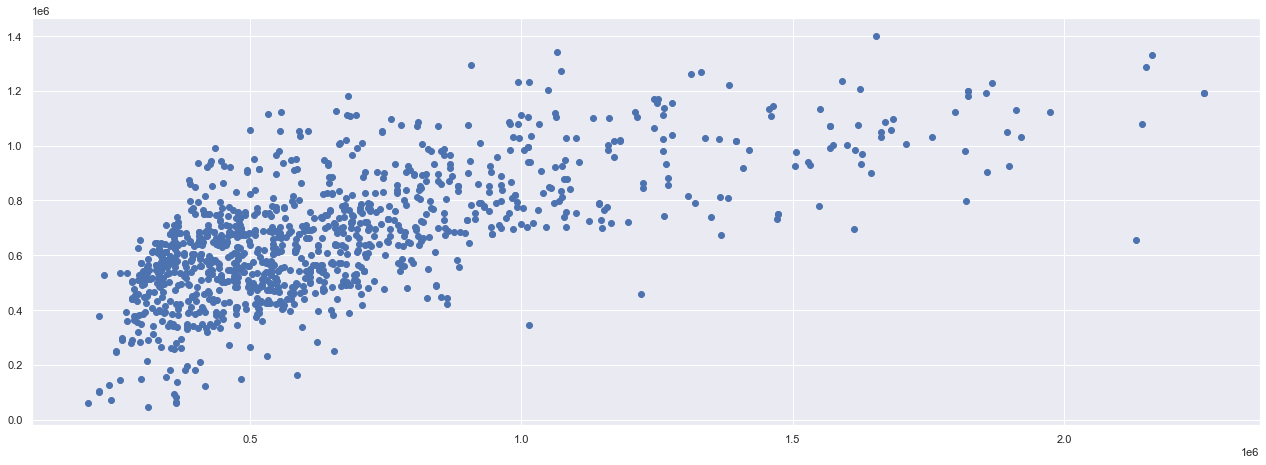

In [63]:
plt.scatter(y_test,LR_predict)

#### Lasso-Rigid regression

In [64]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4203139044054629

In [65]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))

Mean Absolute Error:  190583.44697980914
Mean Squared Error:  65285459181.45048
Root Mean Squared Error:  255510.19388950116
Explained Variance Score:  0.4521843618568826


In [66]:
from sklearn.metrics import r2_score
print(r2_score(y_test,LR_predict))

0.451709198724779


In [67]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [68]:
rd.score(x_train,y_train)

0.4203139044048111

In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_test,LR_predict))

0.451709198724779


### RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9943480689985212


In [71]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1823.260968325792
Mean Squared Error:  402924900.1428966
Root Mean Squared Error:  20072.989317560467
Explained Variance Score:  0.9966258857458862
r2_score: 0.9966160915596982


#### C-V score

In [72]:
rfr_cv=cross_val_score(rf,x,y, cv = 10).mean()
rfr_cv

0.969113563018914

### DecisionTreeRegressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [74]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  1032.9058823529413
Mean Squared Error:  210766404.41538462
Root Mean Squared Error:  14517.796128041771
Explained Variance Score:  0.9982319396017159
r2_score: 0.9982299078200917


#### C-V score

In [75]:
DTR_cv=cross_val_score(DTR,x,y, cv = 10).mean()
DTR_cv

0.9463561788900385

### GradientBoostingRegressor

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9923615514803685


In [77]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  9935.974967888247
Mean Squared Error:  793305810.1835569
Root Mean Squared Error:  28165.68497628909
Explained Variance Score:  0.993344169164176
r2_score: 0.9933375320664756


#### C-V score

In [78]:
gbr_cv=cross_val_score(GBR,x,y, cv = 10).mean()
gbr_cv

0.9657324422874101

### Ridge

In [79]:
from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.42031325941051967


In [80]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  190570.0763384797
Mean Squared Error:  65291757985.619934
Root Mean Squared Error:  255522.5195273793
Explained Variance Score:  0.4521313101415977
r2_score: 0.4516562990986073


### C-V score

In [81]:
rd_cv=cross_val_score(R,x,y, cv = 10).mean()
rd_cv

0.3979085688739953

## After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 2 best models choosen for hyper parameter tuning are
1.GradientBoostingRegressor

2.DecisionTreeRegressor



### 6.Hyper parametertuning 


#### GradientBoostingRegressor

In [82]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [83]:
GBR.fit(x_train,y_train)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed

KeyboardInterrupt: 

In [ ]:
GBR.best_params_

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion '

In [85]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  9853.39340483803
Mean Squared Error:  738848566.9462008
Root Mean Squared Error:  27181.769017968658
Explained Variance Score:  0.9938028110854393
r2_score: 0.9937948836100539


#### C-V score

In [86]:
gbr_cv=cross_val_score(GBR,x,y, cv = 10).mean()
gbr_cv

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion '

0.9683063601306421

#### DecisionTreeRegressor

In [87]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [88]:
GCV.fit(x_train,y_train)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarn

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [89]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 12}

In [91]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=12)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [92]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [93]:
print(DTR.score(x_train,y_train))

0.9995488720094852


In [94]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  2833.1799293580125
Mean Squared Error:  1951759391.782519
Root Mean Squared Error:  44178.721029275155
Explained Variance Score:  0.9836294610018494
r2_score: 0.9836084216265889


#### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS DecisionTreeRegressor

In [95]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  2833.1799293580125
Mean Squared Error:  1951759391.782519
Root Mean Squared Error:  44178.721029275155
Explained Variance Score:  0.9836294610018494
r2_score: 0.9836084216265889


C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

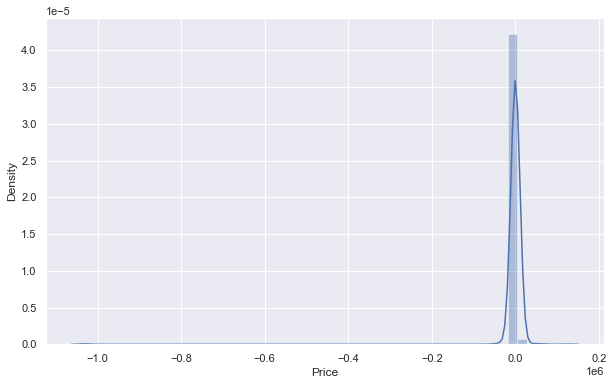

In [98]:
plt.figure(figsize=(10,6))
sns.distplot(y_test-DTR_final)

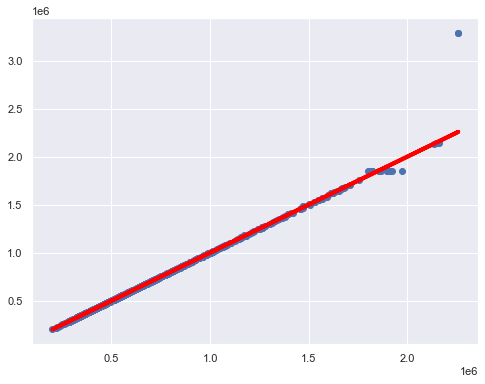

In [99]:

plt.figure(figsize=(8,6))
plt.scatter(y_test,DTR_final)
plt.plot(y_test,y_test,linewidth=4,color='Red')

### SAVING THE MODEL

In [100]:
import joblib
joblib.dump(DTR_final,"final model.pkl")

['final model.pkl']